# Clusterização com Scikit-Learn
- Este notebook faz parte da atividades teóricas do clube de Inteligência Artificial da Escola Sesc de Ensino Médio;
- Nesta atividade iremos aprender mais sobre algoritmos de Clusterização utilizando uma biblioteca muito utilizada para Machine Learning, a Scikit-Learn.

## Scikit-Learn
- A scikit-learn (originalmente scikits.learn) é uma biblioteca de aprendizado de máquina de código aberto para a linguagem de programação Python. Ela inclui vários algoritmos de classificação, regressão e agrupamento incluindo máquinas de vetores de suporte, florestas aleatórias, gradient boosting, k-means e DBSCAN, e é projetada para interagir com as bibliotecas Python numéricas e científicas NumPy e SciPy.

https://scikit-learn.org/

!pip install seaborn

## 1. Preparando os dados

### 1.1 Importando as bibliotecas principais

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**NumPy** é um pacote para a linguagem Python que suporta arrays e matrizes multidimensionais, possuindo uma larga coleção de funções matemáticas para trabalhar com estas estruturas. *Wikipédia*

**Pandas** é uma biblioteca de software criada para a linguagem Python para manipulação e análise de dados. Em particular, oferece estruturas e operações para manipular tabelas numéricas e séries temporais. É software livre sob a licensa licença BSD. *Wikipédia*

**Matplotlib** é uma biblioteca de software para criação de gráficos e visualizações de dados em geral, feita para a da linguagem de programação Python e sua extensão de matemática NumPy. Originalmente criada pelo biólogo e neurocientista americano John D. *Wikipédia*

### 1.2 Importando  e visualizando o Dataset
**Dataset** é uma coleção de dados (conjunto de dados) normalmente tabulados. Por cada elemento se indicam várias características. Cada coluna representa uma variável particular. Cada linha corresponde a um determinado membro do conjunto de dados em questão. Cada valor é conhecido como um dado.

#### Sobre o Dataset deste projeto

**MovieLens ML Small 100k**: https://grouplens.org/datasets/movielens/

MovieLens é um dataset criado pelo Grouplens que coleciona dados de informações e avaliações de filmes do website Movielens (http://movielens.org/). Os conjuntos de dados foram coletados por vários períodos de tempo, dependendo do tamanho do conjunto. Neste caso, usaremos a versão educacional da base que possui 100.000 registros. A base total chega a 27.000.000 de registros 😮. 

**O objetivo** deste treinamento será criar um modelo de Machine Learning utilizando a técnica de Clusterização para agrupar os diferentes filmes e suas categorias e construir um sistema de recomendação, algo similar ao que o Netflix faz.

Descrição das características do Dataset:
- movies.csv: Lista com os filmes e suas categorias **Utilizaremos este arquivo para o treinamento**
  - movieId: Número identificador do filme
  - title: Título do filme
  - genres: Listagem de gêneros
- ratings.csv: Lista das avaliações dos filmes
- links.csv: Links dos filmes na plataforma
- tags.csv: Tags relacionadas aos filmes


**Link para o arquivo .csv do Dataset:** 

#### Lendo o arquivo que contém os nossos dados e criando um Dataframe com o Pandas

In [2]:
filmes = pd.read_csv('movies.csv')

#### Mostrando as 5 primeiras linhas do Dataframe

In [3]:
filmes.head(5)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


#### Mostrando as 5 últimas linhas do Dataframe

In [4]:
filmes.tail(5)

,movieId,title,genres
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation
9741,193609,Andrew Dice Clay: Dice Rules (1991),Comedy


#### Exibindo informações importantes do Dataset

In [5]:
filmes.describe().round(2) # Resume e descreve algumas operações gerais do Dataset. Round(2) arredonda para 2 casas decimais.

,movieId
count,9742.00
mean,42200.35
std,52160.49
min,1.00
25%,3248.25
50%,7300.00
75%,76232.00
max,193609.00


In [6]:
print(f'Tamanho do Dataframe: {filmes.shape[0]} linhas e {filmes.shape[1]} colunas') # Descreve o tamanho do dataframe em uma tupla

Tamanho do Dataframe: 9742 linhas e 3 colunas


In [7]:
filmes.info() # Descreve informaçoes de tamanho e de tipo das características

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


#### Alterando o nome das colunas

In [8]:
filmes.columns = ['filme_id', 'titulo', 'generos']
filmes.head()

,filme_id,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


### 1.3 Selecionando as características principais para o estudo

**Qual coluna utilizaremos para realizar nosso experimento?**

In [9]:
print(filmes.head(2))
print('Qual o problema em trabalharmos utilizando uma coluna com valores concatenados?' )

   filme_id            titulo                                      generos
0         1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy
1         2    Jumanji (1995)                   Adventure|Children|Fantasy
Qual o problema em trabalharmos utilizando uma coluna com valores concatenados?


#### Separando os gêneros em colunas (Binarização)
O método get_dummies() pertence à biblioteca Pandas e converte uma variável categórica (generos) em variáveis indicadoras (dummies).

In [10]:
generos = filmes['generos'].str.get_dummies()
generos.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Unindo os dataframes filmes e generos

In [11]:
dados_filmes = pd.concat([filmes, generos], axis=1)
dados_filmes.head()

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


### 1.4 Quais dessas características influenciam mais os filmes? Como definir pesos?
Usando Sklearn para escalar os dados.
#### Instanciando a Classe Standard Scaler
As classes em linguagens de programação são projetos de um objeto que possui características e comportamentos, ou seja, permite armazenar **propriedades** e **métodos** dentro dela. Instanciar uma classe significa que poderá utilizar tudo que está incluído nela ao atribuí-la a uma variável.

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#### Ensinando a classe a aprender com os nossos dados

In [13]:
generos_escalados = scaler.fit_transform(generos)
generos_escalados

array([[-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       ...,
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995,  2.0807022 , -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534]])

In [14]:
print(f'Menor valor: {generos_escalados.min()}, Maior valor: {generos_escalados.max()}')

Menor valor: -0.900246719161729, Maior valor: 16.897615564472577


## 2. Escolher um modelo

<img src="https://scikit-learn.org/stable/_static/ml_map.png"/>

### 2.1 Clusterização
Clusterização é a tarefa de dividir a população ou os pontos de dados em vários grupos, de modo que os pontos de dados nos mesmos grupos sejam mais semelhantes a outros pontos de dados no mesmo grupo do que os de outros grupos. Em palavras simples, o objetivo é segregar grupos com traços semelhantes e atribuí-los a clusters. 

<img src="clustering.png"/>

Fontes: 
- https://portaldatascience.com/introducao-a-clusterizacao-e-os-diferentes-metodos/#:~:text=Clusteriza%C3%A7%C3%A3o%20%C3%A9%20a%20tarefa%20de,que%20os%20de%20outros%20grupos
- https://rpubs.com/cyobero/k-means

#### Importando o algoritmo KMeans de clusterização da biblioteca scikit-learn

In [15]:
from sklearn.cluster import KMeans

## 3. Ajustar os dados ao modelo e fazer a clusterização

### 3.1 Instanciar a classe KMeans()
O K-means é um algoritmo do tipo não supervisionado, ou seja, que não trabalha com dados rotulados. O objetivo desse algoritmo é encontrar similaridades entre os dados e agrupá-los conforme o número de cluster passado pelo argumento k.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ea/K-means_convergence.gif/617px-K-means_convergence.gif">

Fonte: https://minerandodados.com.br/entenda-o-algoritmo-k-means/

In [16]:
modelo = KMeans(n_clusters=3) #Parâmetros: **n_clusters** representa o número de clusters (agrupamentos) que faremos

In [17]:
modelo.get_params() # Principais parâmetros personalizáveis da classe

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 3,
 'n_init': 10,
 'n_jobs': 'deprecated',
 'precompute_distances': 'deprecated',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

### 3.2 Utilizando o método .fit()
O método .fit() do objeto modelo criado da classe KMeans() treinará o nosso modelo e criará os clusters (agrupamentos). 

In [18]:
modelo.fit(generos_escalados)

KMeans(n_clusters=3)

### 3.3 Exibindo os clusters criados pelo KMeans
O objetivo principal do nosso modelo é agrupar os dados de acordo com as principais características de gêneros.

In [19]:
grupos_criados = modelo.labels_
print(f'Grupos criados: {np.unique(grupos_criados)} | Checando os grupos: {grupos_criados[:5]}')

Grupos criados: [0 1 2] | Checando os grupos: [2 2 1 1 1]


#### Para saber mais
Quer visualizar graficamente o que o KMeans faz? Acesse https://www.naftaliharris.com/blog/visualizing-k-means-clustering/ e faça seus experimentos.

### 3.4 Visualizando os grupos

#### Criando um dataset com os centróides dos grupos

In [20]:
grupos = pd.DataFrame(modelo.cluster_centers_, columns=generos.columns).transpose()
grupos

,0,1,2
(no genres listed),-0.059180,0.023135,-0.059180
Action,1.885581,-0.480241,-0.172898
Adventure,0.634589,-0.279264,0.884542
Animation,-0.094939,-0.243368,2.152768
Children,-0.266194,-0.270451,2.735041
Comedy,-0.353440,0.057679,0.291567
Crime,0.316129,-0.043034,-0.329356
Documentary,-0.204573,0.080896,-0.211980
Drama,-0.303620,0.156102,-0.603421
Fantasy,0.106706,-0.146368,0.945381


#### Plotando os grupos em um gráfico de barras

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001CD4EEB69A0>,
      dtype=object)

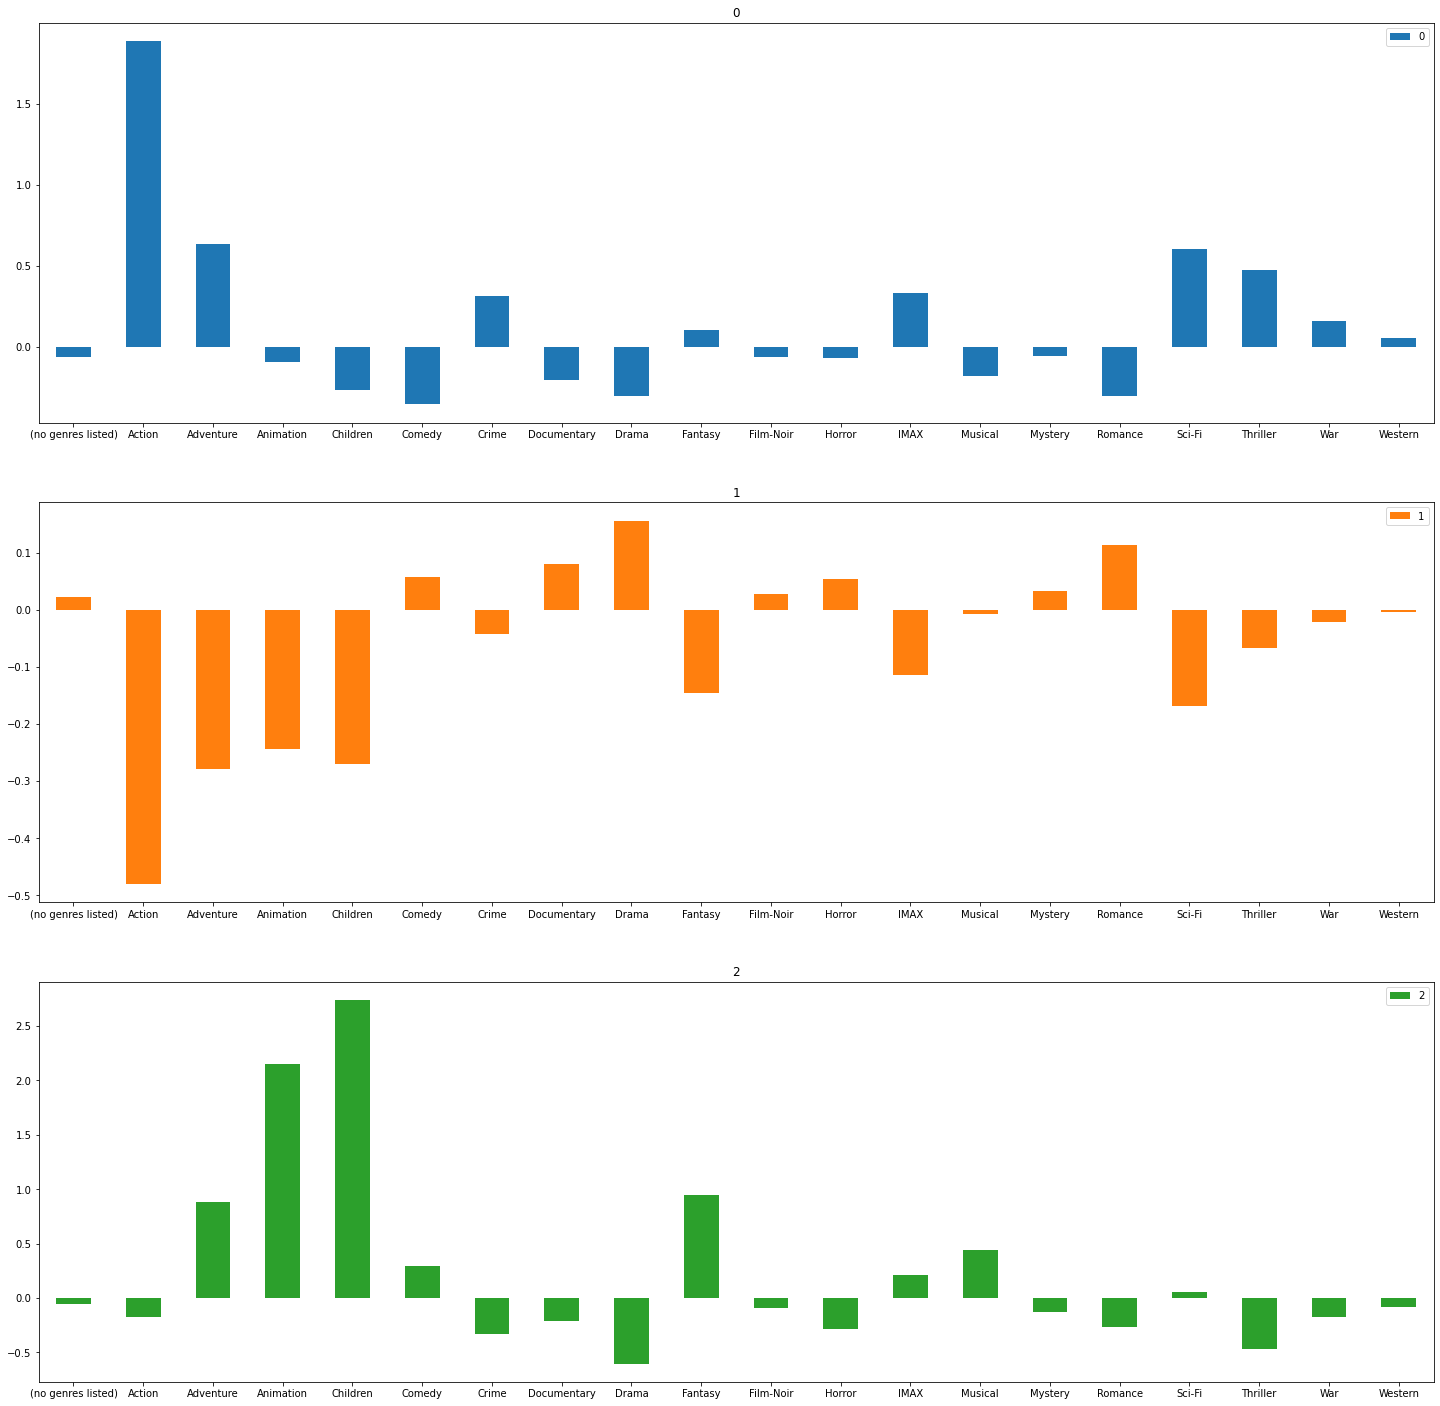

In [21]:
grupos.plot.bar(figsize=(25,25), subplots=True, sharex=False, rot=0)

#### Plotando os grupos em um gráfico de dispersão para observar os centróides
Como plotar um gráfico de n dimensões? **Redução de Dimensionalidade**

In [22]:
from sklearn.manifold import TSNE

In [23]:
tsne = TSNE()
visualizacao  = tsne.fit_transform(generos_escalados)
visualizacao

array([[ 41.534275 , -45.718513 ],
       [-14.461404 ,  48.77081  ],
       [ 45.429073 ,  -3.5304818],
       ...,
       [ -8.778688 , -10.549528 ],
       [-33.76493  , -61.06206  ],
       [ 22.31034  ,  12.994351 ]], dtype=float32)

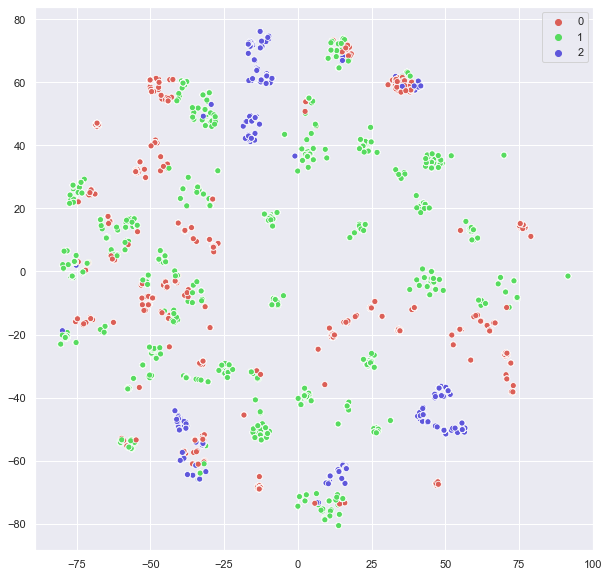

In [24]:
import seaborn as sns
sns.set(rc={'figure.figsize': (10, 10)})
sns.scatterplot(x=visualizacao[:,0], y=visualizacao[:,1], hue=modelo.labels_, palette=sns.color_palette("hls", len(np.unique(grupos_criados))))

#### Existe algum problema com o nosso modelo?

### 3.5 O agrupamento fez sentido?

In [25]:
grupo = 2 # Selecionando o grupo
filtro = modelo.labels_ == grupo # Criando o filtro
dados_filmes[filtro].sample(10) # Mostrandos os filmes deste filtro

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
7999,97172,Frankenweenie (2012),Animation|Comedy|Horror|IMAX,0,0,0,1,0,1,0,...,0,1,1,0,0,0,0,0,0,0
7308,76301,"Emperor's New Groove 2: Kronk's New Groove, Th...",Animation|Children|Comedy|Romance,0,0,0,1,1,1,0,...,0,0,0,0,0,1,0,0,0,0
1548,2084,Newsies (1992),Children|Musical,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
438,502,"Next Karate Kid, The (1994)",Action|Children|Romance,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2503,3345,"Charlie, the Lonesome Cougar (1967)",Adventure|Children,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6149,44022,Ice Age 2: The Meltdown (2006),Adventure|Animation|Children|Comedy,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2028,2700,"South Park: Bigger, Longer and Uncut (1999)",Animation|Comedy|Musical,0,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
6250,46948,Monster House (2006),Animation|Children|Fantasy|Mystery,0,0,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
7929,95543,Ice Age 4: Continental Drift (2012),Adventure|Animation|Comedy,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1935,2566,Doug's 1st Movie (1999),Animation|Children,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## 4. Avaliando o modelo criado

### 4.1 Otimizando o número de grupos
O número de grupos pode variar dependendo do problema em questão. Entretanto, existem métricas que podem nos ajudar a aumentar ou diminuir este número, ou seja, otimizar o agupamento do nosso modelo. 

#### Erro médio absoluto

In [26]:
modelo.inertia_

167861.063370138

In [27]:
def kmeans(numero_de_clusters, generos):
  modelo = KMeans(n_clusters=numero_de_clusters)
  modelo.fit(generos)
  return [numero_de_clusters, modelo.inertia_]

resultado = [kmeans(numero_de_grupos, generos_escalados) for numero_de_grupos in range(1, 41)]
resultado = pd.DataFrame(resultado, 
            columns=['grupos', 'inertia'])

resultado.head()

,grupos,inertia
0,1,194840.000000
1,2,179909.549964
2,3,166224.141854
3,4,157929.949121
4,5,147447.744122


#### Método do cotovelo (Elbow method)

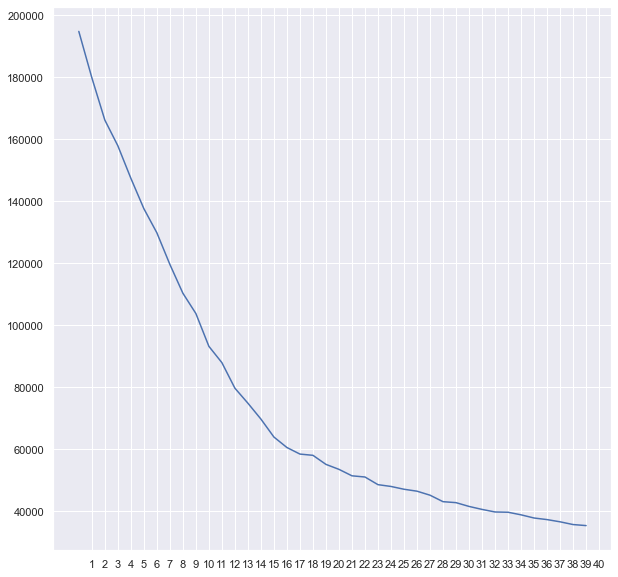

In [28]:
resultado.inertia.plot(xticks=resultado.grupos)

#### Testando um filme aleatório: em qual grupo vai se encaixar?

In [34]:
filme_teste = dados_filmes.sample(1)
filme_teste

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
7054,69306,"Taking of Pelham 1 2 3, The (2009)",Crime|Drama|Thriller,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [35]:
filme_teste.drop(["filme_id", "titulo", "generos"], axis=1, inplace=True)
filme_teste_resultado = modelo.predict(filme_teste)
print(f'O filme de teste pertence à categoria: {filme_teste_resultado[0]}')

O filme de teste pertence à categoria: 1


## 5. O que poderíamos fazer para melhorar nosso agrupamento?

### Melhorar através da experimentação!